In [1]:
# import analysis library
import pandas as pd, numpy as np 
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [120]:
# create some fake data 
# sklearn requires the data shape of (row number, column number)
# since shape(x) = (100,) originally, we reshape x to x_ here 
# https://stackoverflow.com/questions/30813044/sklearn-found-arrays-with-inconsistent-numbers-of-samples-when-calling-linearre


x = np.linspace(0,100,50).reshape(50,1)
a = 5
b = 10
#noise = np.random.rand(100).reshape(100,1)
noise = np.random.randint(1000, size=50).reshape(50,1)
# y = 0.1*x + noise 
y = a*x+noise

In [158]:
def linear_model_(x,y,prob):
    from sklearn.linear_model import LinearRegression
    import scipy.stats
    
    regr = LinearRegression()
    regr.fit(x,y)
    plt.scatter(x,y, label='data')
    plt.plot(x,regr.predict(x),label='fitting line')
    plt.legend(loc='upper left')
    plt.xlabel('x')
    plt.xlabel('y')
    plt.title('Linear Regression :  y=a*x+b')
    print ('-----------')
    print ('regression coefficient : ', regr.coef_)
    print ('regression interception : ', regr.intercept_)
    print ('residues : ', regr.residues_)
    # confidence interval
    # https://gist.github.com/riccardoscalco/5356167
    n = len(x)
    xy = x * y
    xx = x * x
    # 
    b1 = (xy.mean() - x.mean() * y.mean()) / (xx.mean() - x.mean()**2)
    b0 = y.mean() - b1 * x.mean()
    s2 = 1./n * sum([(y[i] - b0 - b1 * x[i])**2 for i in range(n)])
    #print ('regression interception = ',b0)
    #print ('regression coefficient = ',b1)
    print ('s2 = ',s2)
    print ('')
    #prob = .95 
    alpha = 1 - prob
    c1 = scipy.stats.chi2.ppf(alpha/2.,n-2)
    c2 = scipy.stats.chi2.ppf(1-alpha/2.,n-2)
    print ('confidence interval of s2: ',[n*s2/c2,n*s2/c1])
    c = -1 * scipy.stats.t.ppf(alpha/2.,n-2)
    bb1 = c * (s2 / ((n-2) * (xx.mean() - (x.mean())**2)))**.5
    print ('confidence interval of regression coefficient: ',[b1-bb1,b1+bb1])
    
    bb0 = c * ((s2 / (n-2)) * (1 + (x.mean())**2 / (xx.mean() - (x.mean())**2)))**.5
    print ('confidence interval of regression interception: ',[b0-bb0,b0+bb0])
    print ('-----------')
    return None
    



-----------
regression coefficient :  [[ 4.3904]]
regression interception :  [ 506.8]
residues :  [ 4004411.04653061]
s2 =  80088.2209306

confidence interval of s2:  [58015.952325132173, 130205.6708168847]
confidence interval of regression coefficient:  [1.6017085525353174, 7.1790914474646854]
confidence interval of regression interception:  [344.97545415797902, 668.62454584202089]
-----------


//anaconda/envs/g_dash/lib/python3.4/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


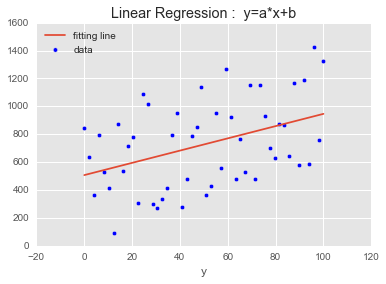

In [159]:
linear_model_(x,y,.95)

In [162]:
# test again 

x2 = np.linspace(0,100,500).reshape(500,1)
a = 15
b = 200
#noise = np.random.rand(100).reshape(100,1)
noise = np.random.randint(1000, size=500).reshape(500,1)
# y = 0.1*x + noise 
y2 = a*x2+noise

-----------
regression coefficient :  [[ 13.99713868]]
regression interception :  [ 563.83906587]
residues :  [ 36160863.70569767]
s2 =  72321.7274114

confidence interval of s2:  [64374.398826698103, 82547.719823322041]
confidence interval of regression coefficient:  [13.178586032136971, 14.815691333132476]
confidence interval of regression interception:  [516.55623555179125, 611.12189618473633]
-----------


//anaconda/envs/g_dash/lib/python3.4/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


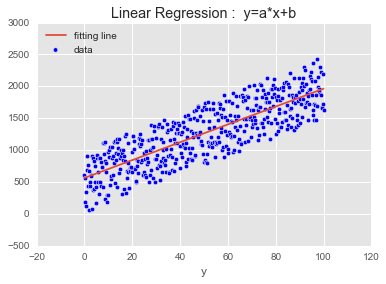

In [163]:
linear_model_(x2,y2,.95)